In [113]:
# Check and print which .csvs are available
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Get all .csv files in the current directory and sort them properly
csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
# Sort files by the sequence number to ensure correct order
csv_files.sort(key=lambda x: int(re.search(r'seq(\d+)', x).group(1)) if re.search(r'seq(\d+)', x) else 0)
# get original library size from test_library.csv to get bin
test_library = pd.read_csv('../test_library_df.csv')

print(csv_files)


['parameter_sweep_results_seq0.csv', 'parameter_sweep_results_seq1.csv', 'parameter_sweep_results_seq2.csv', 'parameter_sweep_results_seq3.csv']


In [114]:
# Create df for combinded results of available .csvs, add seq col from filename
# add bin from test_library.csv
df_list = []  # List to store dataframes
for i in range(len(csv_files)):
    temp_df = pd.read_csv(csv_files[i])
    temp_df['seq'] = csv_files[i].split('_')[-1]
    temp_df['bin'] = test_library['bin'][i]
    df_list.append(temp_df)

# Concatenate all dataframes
df = pd.concat(df_list, ignore_index=True)
df

,num_seqs,n_clusters,clustering_method,spearmanr_background,spearmanr_foreground,spearmanr_cluster_bg,runtime_seconds,seq,bin
0,100,10,kmeans,0.950211,0.330222,0.950211,9.49,seq0.csv,mid
1,100,20,kmeans,0.934357,0.442143,0.934357,8.81,seq0.csv,mid
2,100,30,kmeans,0.935910,0.390426,0.935910,9.88,seq0.csv,mid
3,100,40,kmeans,0.920932,0.422596,0.920932,11.04,seq0.csv,mid
4,100,50,kmeans,0.913786,0.447026,0.913786,11.72,seq0.csv,mid
...,...,...,...,...,...,...,...,...,...
175,100000,10,kmeans,0.989283,0.949909,0.989283,105.26,seq3.csv,low
176,100000,20,kmeans,0.995077,0.964189,0.995077,137.73,seq3.csv,low
177,100000,30,kmeans,0.994490,0.965497,0.994490,170.56,seq3.csv,low
178,100000,40,kmeans,0.994552,0.960615,0.994552,194.38,seq3.csv,low


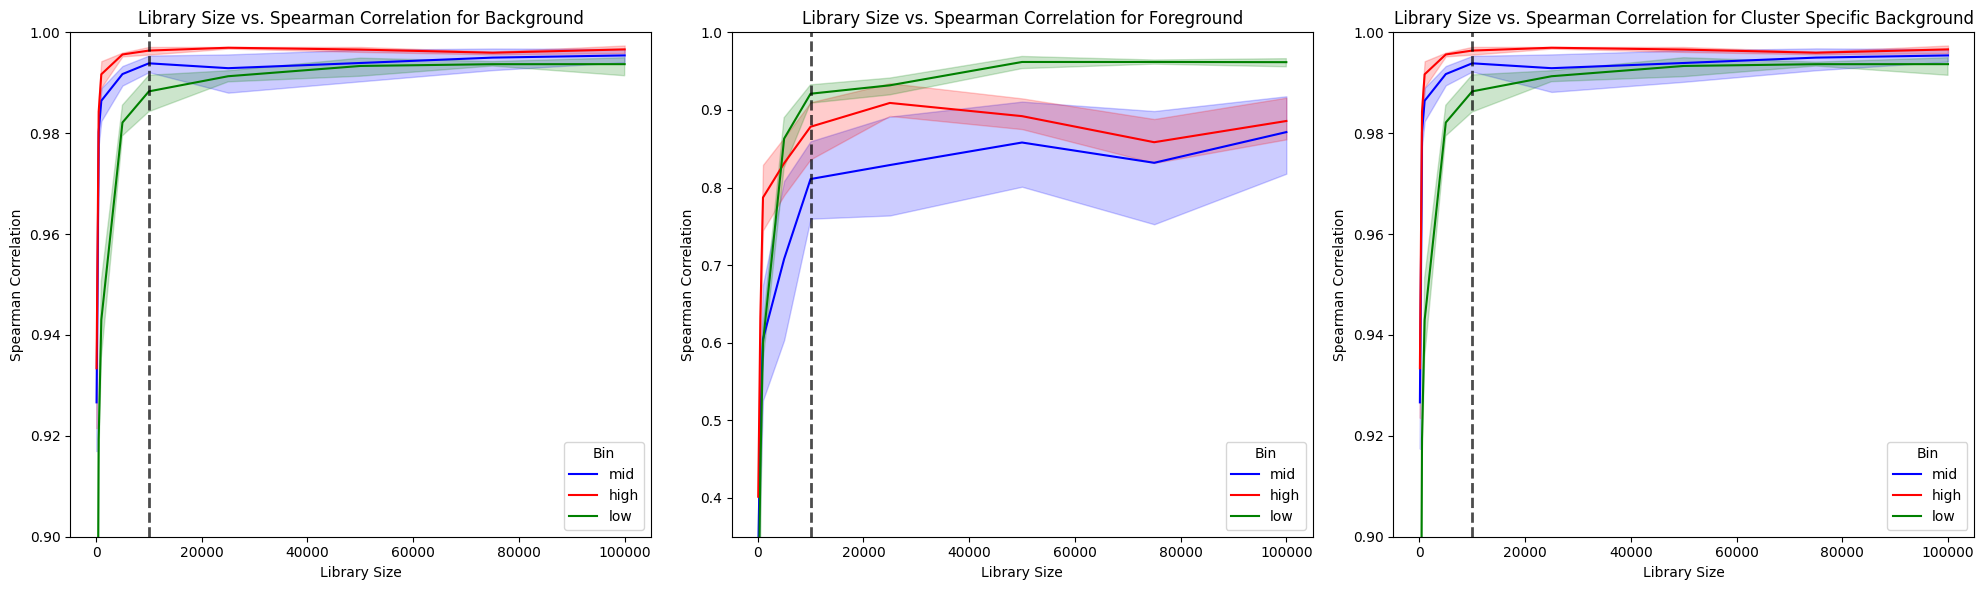

In [115]:
# Plot Library size vs. spearman correlation line plot (only for K-means)
# Three subgraphs for Background, Foreground, and Cluster specific background 
pallette = {'low': 'green', 'mid': 'blue', 'high': 'red'}
y_axis_lower_limit = 0.35

# figure dimensions 1x3
plt.figure(figsize=(20, 6))  # Further increased width and height for better spacing

# Background
plt.subplot(1, 3, 1)
sns.lineplot(data=df[df['clustering_method'] == 'kmeans'], x='num_seqs', y='spearmanr_background', hue='bin', palette=pallette)
plt.axvline(x=10000, color='black', linestyle='--', linewidth=2, alpha=0.7)
plt.title('Library Size vs. Spearman Correlation for Background')
plt.xlabel('Library Size')
plt.ylabel('Spearman Correlation')
plt.ylim(0.9, 1)
plt.legend(title='Bin')  # Changed to match the hue variable

# Foreground
plt.subplot(1, 3, 2)
sns.lineplot(data=df[df['clustering_method'] == 'kmeans'], x='num_seqs', y='spearmanr_foreground', hue='bin', palette=pallette)
plt.axvline(x=10000, color='black', linestyle='--', linewidth=2, alpha=0.7)
plt.title('Library Size vs. Spearman Correlation for Foreground')
plt.xlabel('Library Size')
plt.ylabel('Spearman Correlation')
plt.ylim(y_axis_lower_limit, 1)
plt.legend(title='Bin')  # Changed to match the hue variable

# Cluster specific background
plt.subplot(1, 3, 3)
sns.lineplot(data=df[df['clustering_method'] == 'kmeans'], x='num_seqs', y='spearmanr_cluster_bg', hue='bin', palette=pallette)
plt.axvline(x=10000, color='black', linestyle='--', linewidth=2, alpha=0.7)
plt.title('Library Size vs. Spearman Correlation for Cluster Specific Background')
plt.xlabel('Library Size')
plt.ylabel('Spearman Correlation')
plt.ylim(0.9, 1)
plt.legend(title='Bin')  # Changed to match the hue variable

plt.tight_layout()
plt.show()


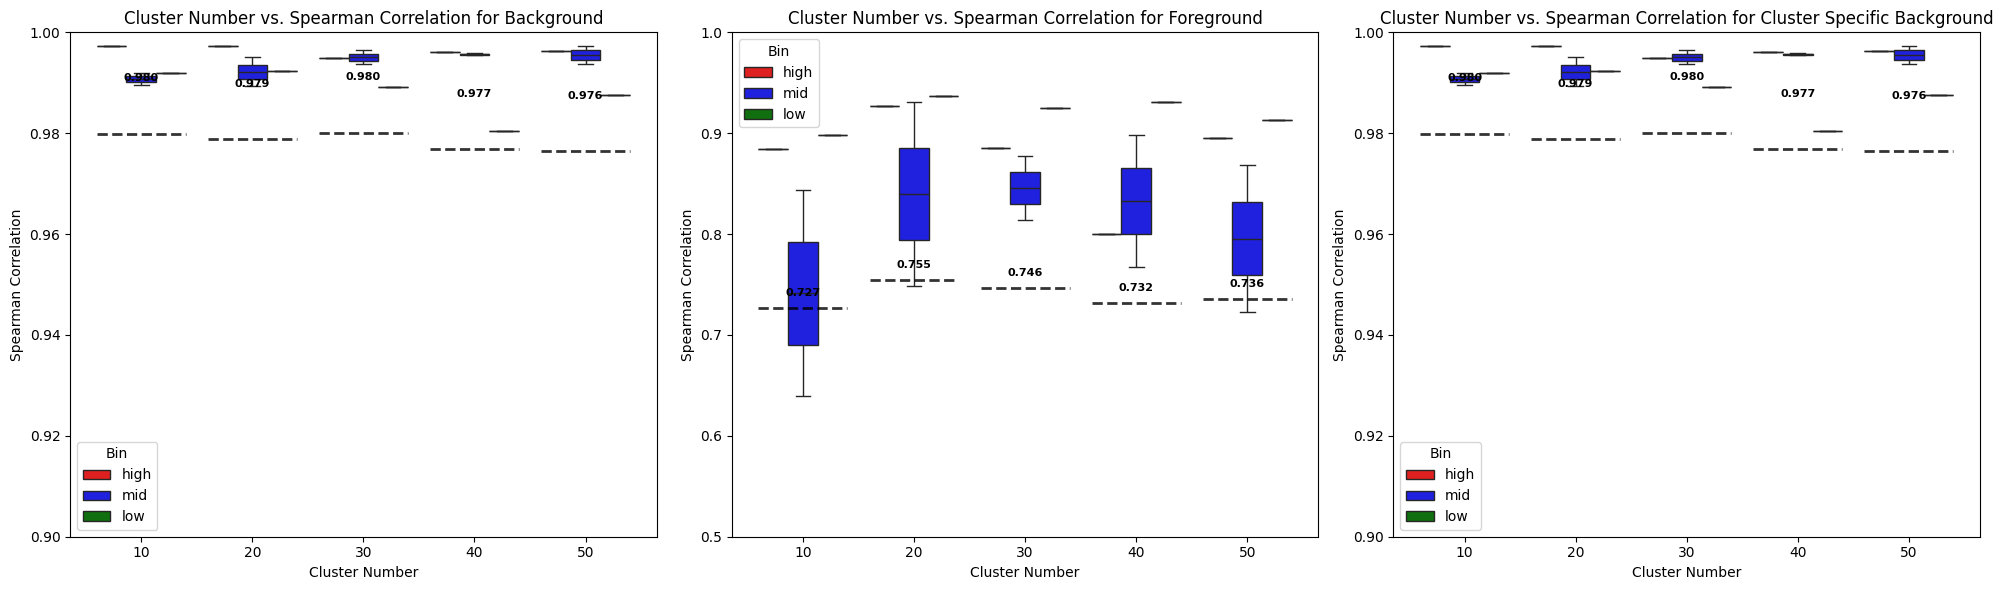

In [116]:
# Plot cluster number vs. spearman correlation boxplot
# 3 subgraphs for Background, Foreground, and Cluster specific background 

plt.figure(figsize=(20, 6))  # Further increased width and height for better spacing
df_for_n_clusters = df[df['num_seqs'] == 10000]
# Background
plt.subplot(1, 3, 1)
sns.boxplot(data=df_for_n_clusters, x='n_clusters', y='spearmanr_background', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'])
# Add mean line for each cluster
cluster_means = df.groupby('n_clusters')['spearmanr_background'].mean()
unique_clusters = sorted(df['n_clusters'].unique())
for i, cluster_num in enumerate(unique_clusters):
    mean_val = cluster_means[cluster_num]
    # Calculate x position for this cluster (centered in its box)
    x_pos = i
    # Draw line only across this cluster's box width
    plt.plot([x_pos-0.4, x_pos+0.4], [mean_val, mean_val], color='black', linestyle='--', linewidth=2, alpha=0.8)
    # Add mean value text on top of line
    plt.text(x_pos, mean_val + 0.01, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
plt.title('Cluster Number vs. Spearman Correlation for Background')
plt.ylim(0.9, 1)
plt.xlabel('Cluster Number')
plt.ylabel('Spearman Correlation')
plt.legend(title='Bin')

# Foreground
plt.subplot(1, 3, 2)
sns.boxplot(data=df_for_n_clusters, x='n_clusters', y='spearmanr_foreground', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'])
# Add mean line for each cluster
cluster_means = df.groupby('n_clusters')['spearmanr_foreground'].mean()
unique_clusters = sorted(df['n_clusters'].unique())
for i, cluster_num in enumerate(unique_clusters):
    mean_val = cluster_means[cluster_num]
    # Calculate x position for this cluster (centered in its box)
    x_pos = i
    # Draw line only across this cluster's box width
    plt.plot([x_pos-0.4, x_pos+0.4], [mean_val, mean_val], color='black', linestyle='--', linewidth=2, alpha=0.8)
    # Add mean value text on top of line
    plt.text(x_pos, mean_val + 0.01, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
plt.title('Cluster Number vs. Spearman Correlation for Foreground')
plt.ylim(0.50, 1)
plt.xlabel('Cluster Number')
plt.ylabel('Spearman Correlation')
plt.legend(title='Bin')

# Cluster specific background
plt.subplot(1, 3, 3)
sns.boxplot(data=df_for_n_clusters, x='n_clusters', y='spearmanr_cluster_bg', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'])
# Add mean line for each cluster
cluster_means = df.groupby('n_clusters')['spearmanr_cluster_bg'].mean()
unique_clusters = sorted(df['n_clusters'].unique())
for i, cluster_num in enumerate(unique_clusters):
    mean_val = cluster_means[cluster_num]
    # Calculate x position for this cluster (centered in its box)
    x_pos = i
    # Draw line only across this cluster's box width
    plt.plot([x_pos-0.4, x_pos+0.4], [mean_val, mean_val], color='black', linestyle='--', linewidth=2, alpha=0.8)
    # Add mean value text on top of line
    plt.text(x_pos, mean_val + 0.01, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
plt.title('Cluster Number vs. Spearman Correlation for Cluster Specific Background')
plt.ylim(0.9, 1)
plt.xlabel('Cluster Number')
plt.ylabel('Spearman Correlation')
plt.legend(title='Bin')

plt.tight_layout()
plt.show()

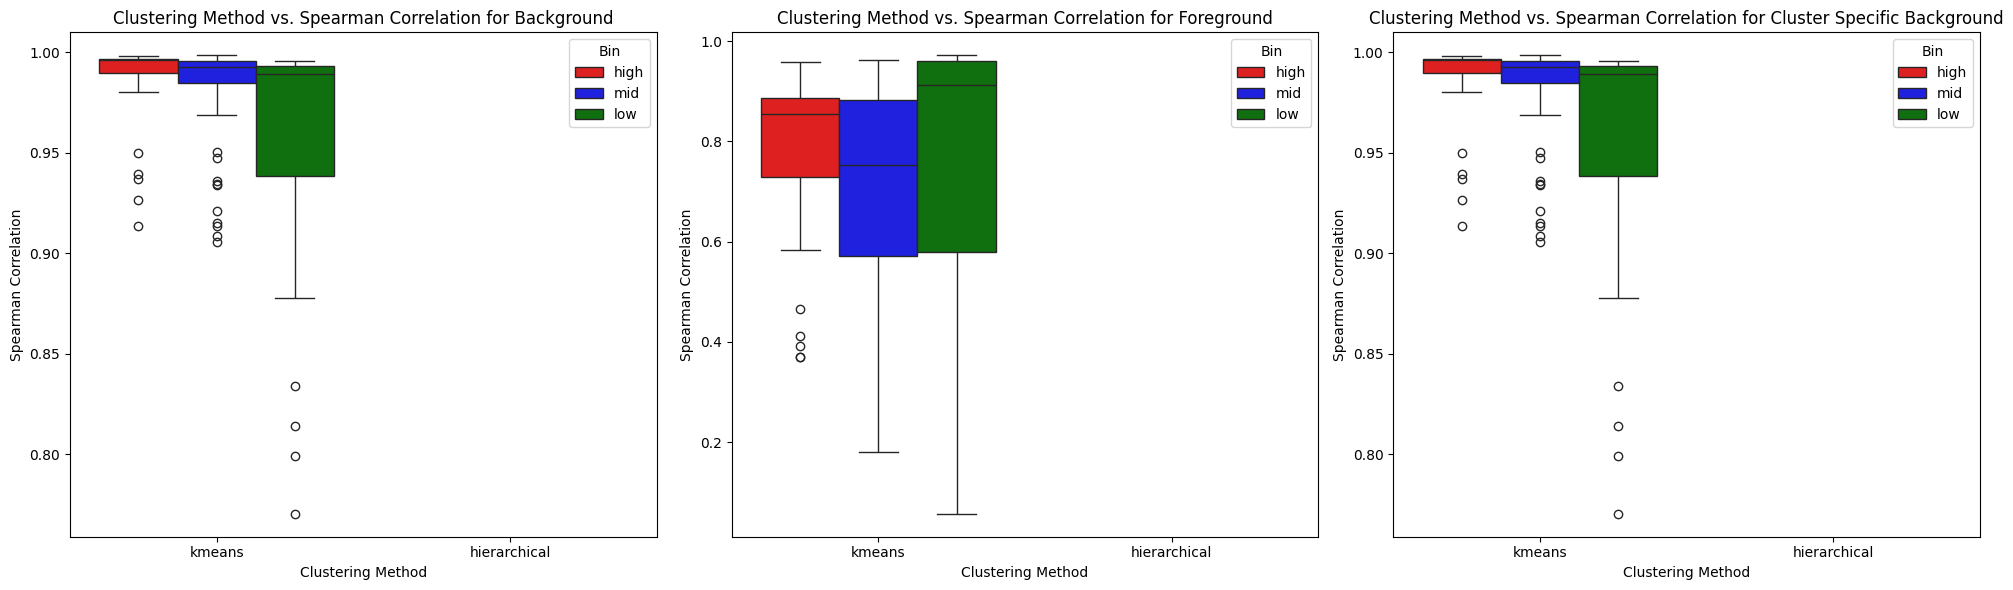

In [117]:
# Plot cluster method vs. spearman correlation boxplot
# 3 subgraphs for Background, Foreground, and Cluster specific background 

plt.figure(figsize=(20, 6))  # Further increased width and height for better spacing

# Background
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='clustering_method', y='spearmanr_background', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'], order=['kmeans', 'hierarchical'])
plt.title('Clustering Method vs. Spearman Correlation for Background')
plt.xlabel('Clustering Method')
plt.ylabel('Spearman Correlation')
plt.legend(title='Bin')

# Foreground
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='clustering_method', y='spearmanr_foreground', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'], order=['kmeans', 'hierarchical'])
plt.title('Clustering Method vs. Spearman Correlation for Foreground')
plt.xlabel('Clustering Method')
plt.ylabel('Spearman Correlation')
plt.legend(title='Bin')

# Cluster specific background
plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='clustering_method', y='spearmanr_cluster_bg', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'], order=['kmeans', 'hierarchical'])
plt.title('Clustering Method vs. Spearman Correlation for Cluster Specific Background')
plt.xlabel('Clustering Method')
plt.ylabel('Spearman Correlation')
plt.legend(title='Bin')

plt.tight_layout()
plt.show()




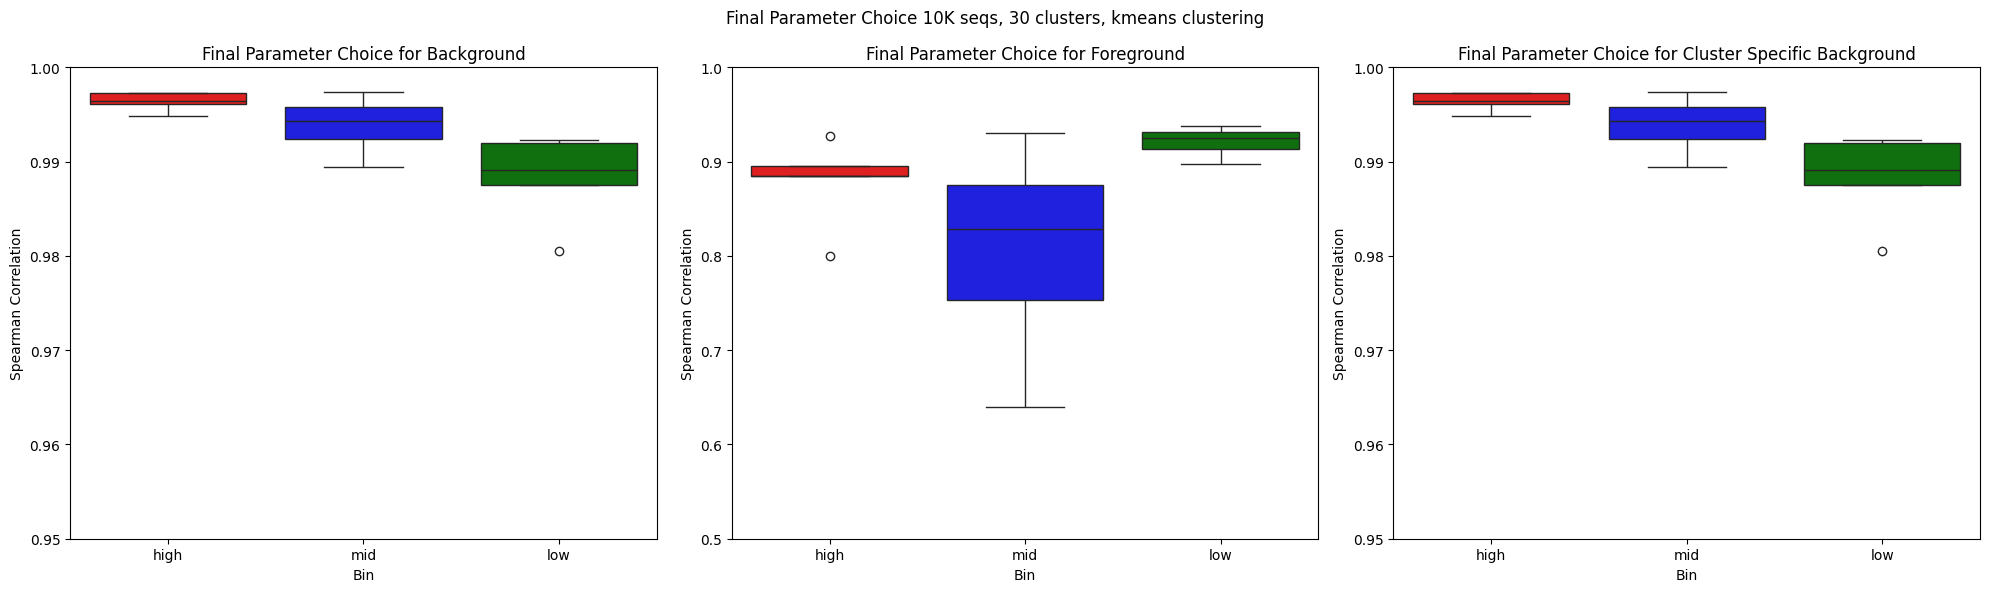

In [122]:
# Plot final parameter choices 
num_seqs_choice = 10000
n_clusters_choice = 30
clustering_method_choice = 'kmeans'

#Plot box plots for final parameter choices 
plt.figure(figsize=(20, 6))  # Further increased width and height for better spacing
plt.suptitle(f'Final Parameter Choice {int(num_seqs_choice/1000)}K seqs, {n_clusters_choice} clusters, {clustering_method_choice} clustering')

# Background
plt.subplot(1, 3, 1)
sns.boxplot(data=df[df['num_seqs'] == num_seqs_choice], x= 'bin', y='spearmanr_background', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'], order=['high', 'mid', 'low'])
plt.title('Final Parameter Choice for Background')
plt.xlabel('Bin')
plt.ylabel('Spearman Correlation')
plt.ylim(0.95, 1)

# Foreground
plt.subplot(1, 3, 2)
sns.boxplot(data=df[df['num_seqs'] == num_seqs_choice], x='bin', y='spearmanr_foreground', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'], order=['high', 'mid', 'low'])
plt.title('Final Parameter Choice for Foreground')
plt.xlabel('Bin')
plt.ylabel('Spearman Correlation')
plt.ylim(0.5, 1)

# Cluster specific background
plt.subplot(1, 3, 3)
sns.boxplot(data=df[df['num_seqs'] == num_seqs_choice], x='bin', y='spearmanr_cluster_bg', hue='bin', palette=pallette, hue_order=['high', 'mid', 'low'], order=['high', 'mid', 'low'])
plt.title('Final Parameter Choice for Cluster Specific Background')
plt.xlabel('Bin')
plt.ylabel('Spearman Correlation')
plt.ylim(0.95, 1)

plt.tight_layout()
plt.show()